# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

dice_numbers=[1,2,3,4,5,6]

random.choice(dice_numbers)

results=pd.DataFrame({"results":[random.choice(dice_numbers) for i in range(10)]})

#### 2.- Plot the results sorted by value.

In [3]:
# your code here
results.sort_values(by=["results"])

,results
1,2
0,3
5,3
9,3
3,5
6,5
7,5
8,5
2,6
4,6


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

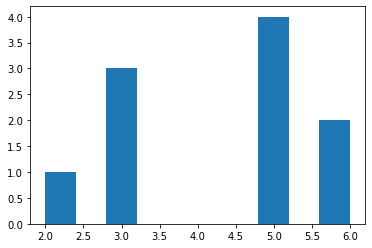

' Histogram shows the absolute frequency of each number on the results variable, i.e., the amount of times each number appears in the DataFrame '

In [4]:
# your code here

plt.hist(results)
plt.show()

""" Histogram shows the absolute frequency of each number on the results variable, i.e., the amount of times each number appears in the DataFrame """

In [5]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
sum=0

def avg (results):
    sum=0
    for element in results.values:
        sum=sum+element

    return (sum/len(results))

avg(results)

array([4.3])

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

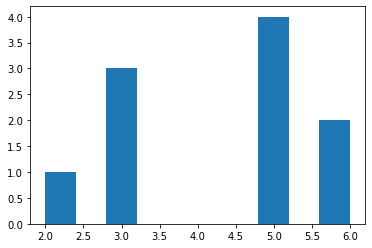

4.3


[(2, 1), (3, 3), (5, 4), (6, 2)]

In [7]:
# your code here

rolls=list(results["results"])

rolls.sort()

counts=[]

for element in set(rolls):
    counts.append(rolls.count(element))


frequency_dist=list(zip(set(rolls),counts)) # (number, frequency)

plt.hist(rolls)
plt.show()

def avg(frequency_dist):
    num=0
    den=0
    for element in frequency_dist:
        num=element[0]*element[1]+num
        den=element[1]+den

    return num/den


print(avg(frequency_dist))

frequency_dist

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here


def median_(array):
    if len(array)%2==0:
        return (array[int(len(array)/2-1)]+array[int(len(array)/2)])/2
    else:
        return array[int(len(array)/2)]


median_([1,2,3,4,5,6,7,8])

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
# your code here


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

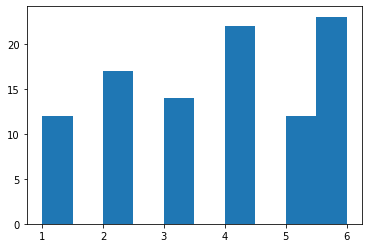

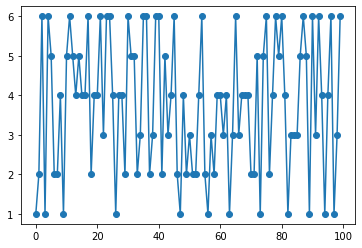

In [10]:
# your code here
roll=pd.read_csv("../data/roll_the_dice_hundred.csv")

roll.sort_values(by="value")
plt.hist(roll.sort_values(by="value")["value"])
plt.show()

roll

plt.plot(roll["value"], '-o')
plt.show()

In [11]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [12]:
# your code here

def avg2(array):
    array=list(array)
    counts=[]
    for element in set(array):
        counts.append(array.count(element))

    frequency_dist=list(zip(set(array),counts))
    num=0
    den=0
    for element in frequency_dist:
        num=element[0]*element[1]+num
        den=element[1]+den
    
    return num/den

avg2(roll["value"])


3.74

#### 3.- Now, calculate the frequency distribution.


In [13]:
# your code here

def frequency(array):
    array=list(array)
    counts=[]
    for element in set(array):
        counts.append(array.count(element))

    frequency_dist=list(zip(set(array),counts))
    return frequency_dist


frequency(roll["value"])


[(1, 12), (2, 17), (3, 14), (4, 22), (5, 12), (6, 23)]

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

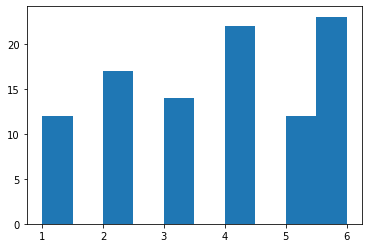

' frequencies are similiar between each of the numbers, which makes sense, since every number has the same probability when rolling the dice'

In [14]:
# your code here

plt.hist(roll["value"])
plt.show()


""" frequencies are similiar between each of the numbers, which makes sense, since every number has the same probability when rolling the dice"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

[]

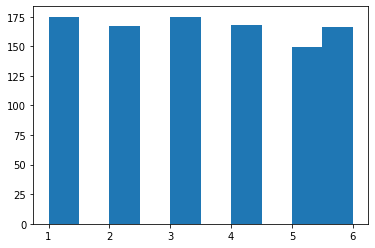

In [15]:
# your code here

roll_thousand=pd.read_csv("../data/roll_the_dice_thousand.csv")

plt.hist(roll_thousand["value"])
plt.plot()

In [16]:
"""
Frequencies are closer to eachother withtin each number, since you have more rolls, each of the frequencies will tend more to 1/6 of the total frequency
"""

'\nFrequencies are closer to eachother withtin each number, since you have more rolls, each of the frequencies will tend more to 1/6 of the total frequency\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

[(1.0, 2), (2.0, 2), (4.0, 1), (5.0, 2), (6.0, 2), (7.0, 1), (8.0, 5), (9.0, 2), (10.0, 3), (11.0, 3), (12.0, 11), (13.0, 6), (14.0, 10), (15.0, 8), (16.0, 8), (17.0, 10), (18.0, 7), (19.0, 11), (20.0, 13), (21.0, 14), (22.0, 16), (23.0, 17), (24.0, 18), (25.0, 19), (26.0, 23), (27.0, 25), (28.0, 20), (29.0, 26), (30.0, 34), (31.0, 24), (32.0, 30), (33.0, 22), (34.0, 29), (35.0, 33), (36.0, 31), (37.0, 30), (38.0, 30), (39.0, 45), (40.0, 27), (41.0, 36), (42.0, 32), (43.0, 32), (44.0, 23), (45.0, 29), (46.0, 23), (47.0, 17), (48.0, 19), (49.0, 19), (50.0, 16), (51.0, 9), (52.0, 14), (53.0, 12), (54.0, 13), (55.0, 13), (56.0, 15), (57.0, 7), (58.0, 7), (59.0, 8), (60.0, 4), (61.0, 2), (62.0, 4), (63.0, 7), (64.0, 2), (65.0, 2), (66.0, 3), (67.0, 4), (68.0, 3), (69.0, 1), (70.0, 1), (71.0, 1), (73.0, 1), (82.0, 1)]


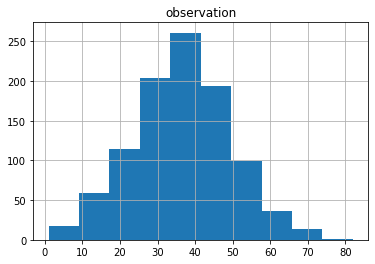

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [59]:
# your code here

pop_age=pd.read_csv("../data/ages_population.csv")

print(frequency(pop_age["observation"]))



pop_age.hist()
plt.show()

print(pop_age.mean())
print(pop_age.std())

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [44]:
# your code here

print(pop_age.mean())
print(pop_age.std())

""" Yes """

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [19]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [48]:
# your code here

pop_age_2=pd.read_csv("../data/ages_population2.csv")

frequency(pop_age_2["observation"])

[(32.0, 31),
 (33.0, 22),
 (34.0, 7),
 (35.0, 3),
 (36.0, 2),
 (19.0, 3),
 (20.0, 13),
 (21.0, 17),
 (22.0, 35),
 (23.0, 41),
 (24.0, 78),
 (25.0, 98),
 (26.0, 120),
 (27.0, 125),
 (28.0, 139),
 (29.0, 115),
 (30.0, 90),
 (31.0, 61)]

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [21]:
"""
Yes, there is a lot of difference. This new data set has much less values, but with more absolute frequency on each valeu

"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [51]:
# your code here

print(pop_age_2.mean())

print(pop_age_2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [52]:
"""
Standard deviation is much lesser, values are more concentrated near the mean. That's why there are less values, but with more absolute frequency
"""

"\nStandard deviation is much lesser, values are more concentrated near the mean. That's why there are less values, but with more absolute frequency\n"

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <BarContainer object of 10 artists>)

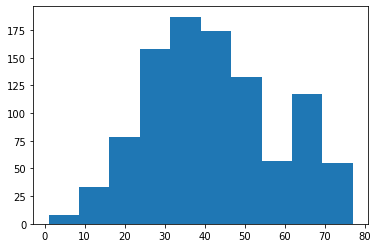

In [61]:
# your code here

pop_age_3=pd.read_csv("../data/ages_population3.csv")

plt.hist(pop_age_3)


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [60]:
print(pop_age_3.mean())
print(pop_age_3.std())



observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [26]:
"""

Since you have a spike of data around the values 60-70, then the standard deviation increases, data is more dispersed

"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [64]:
# your code here

q1=np.quantile(pop_age_3,0.25)
q2=np.quantile(pop_age_3,0.50)
q3=np.quantile(pop_age_3,0.75)
q4=np.quantile(pop_age_3,1)


print(q1,q2,q3,q4)

30.0 40.0 53.0 77.0


In [28]:
"""
Data is more disperserd on the third and fourth quartile, and more concentrated on first and second quantile
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [65]:
# your code here

q1=np.quantile(pop_age_3,0.20)
q2=np.quantile(pop_age_3,0.40)
q3=np.quantile(pop_age_3,0.60)
q4=np.quantile(pop_age_3,0.8)
q5=np.quantile(pop_age_3,1)


print(q1,q2,q3,q4,q5)


28.0 36.0 45.0 57.0 77.0


In [30]:
"""
between quintile 4 and 5 the data is very dispersed 
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [78]:
# your code here

print(float(pop_age.mean()),float(pop_age_2.mean()),float(pop_age_3.mean()))
print(float(pop_age.std()),float(pop_age_2.std()),float(pop_age_3.std()))
print(float(pop_age.median()),float(pop_age_2.median()),float(pop_age_3.median()))



36.56 27.155 41.989
12.816499625976762 2.969813932689186 16.144705959865934
37.0 27.0 40.0


In [79]:
"""
Population in neighborhood 3 is the oldest on average and with the biggest span of data ages

Population in neighborhood 2 is the youngest with a very low span of data ages

Population in neighborhood 1 is the one with average age on the midle, but also with a high span of data ages

"""

'\nPopulation in neighborhood 3 is the oldest on average and with the biggest span of data ages\n\nPopulation in neighborhood 2 is the youngest with a very low span of data ages\n\nPopulation in neighborhood 1 is the one with average age on the midle, but also with a high span of data ages\n\n'